In [1]:
#load the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the datasets

users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users_eng = pd.read_csv('takehome_user_engagement.csv', index_col = 'time_stamp', parse_dates=['time_stamp'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users_eng.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [5]:
# explore users data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
users.object_id.nunique(), users.email.nunique(),users.name.nunique(),users.org_id.nunique()

(12000, 11980, 11355, 417)

Expect 'last_session_creation_time', 'invited_by_user_id', the other features have 12000 records, although we have 12k users, less email accounts shown that some users used the same email registered different IDs.and they are from 417 organizations separately.

In [8]:
df = users_eng.resample('W').sum().reset_index().sort_values('time_stamp')

In [9]:
df.head()

,time_stamp,user_id,visited
0,2012-06-03,195734,30
1,2012-06-10,358267,68
2,2012-06-17,639592,104
3,2012-06-24,518845,97
4,2012-07-01,740615,126


/Users/dongw/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# users')

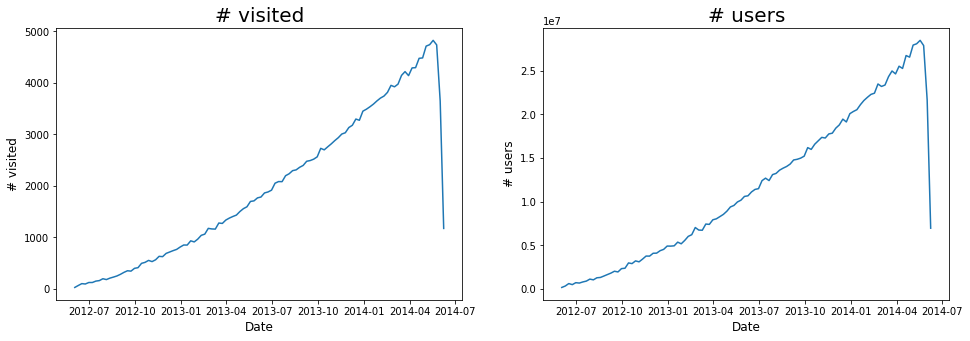

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].plot('time_stamp','visited', data = df)
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_ylabel('# visited', fontsize=12)
ax[0].set_title("# visited", fontsize=20)
ax[1].plot('time_stamp','user_id', data = df)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('# users', fontsize=12)
ax[1].set_title("# users", fontsize=20)


Total visits by users to the website have been increaseing weekly since mid of 2012, it dropped quickly after May of 2014.

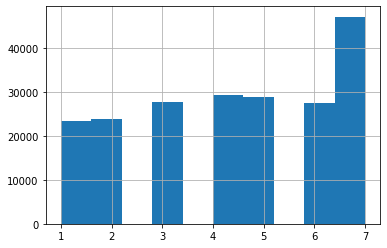

In [11]:
users_eng.groupby('user_id').rolling('7D').visited.sum().hist()

The distribution of the number of visits are equal from 1-5, there are some users that visited more than 6 times, they should belong to 'adopted users'.

In [12]:
_grouped = users_eng.groupby("user_id").rolling('7D').visited.count()
df_7d_count = pd.DataFrame(_grouped)
df_7d_count = df_7d_count.rename(columns={"visited":"visited_Count_7D"})
df_7d_count.head()

visited_Count_7D
user_id time_stamp                           
1       2014-04-22 03:53:30               1.0
2       2013-11-15 03:45:04               1.0
        2013-11-29 03:45:04               1.0
        2013-12-09 03:45:04               1.0
        2013-12-25 03:45:04               1.0

In [13]:
df_7d_mean = pd.DataFrame(users_eng.groupby("user_id").rolling('7D').visited.mean())
df_7d_mean = df_7d_mean.rename(columns={"visited":"Mean_visited_7D"})
df_7d_mean.head()

Mean_visited_7D
user_id time_stamp                          
1       2014-04-22 03:53:30              1.0
2       2013-11-15 03:45:04              1.0
        2013-11-29 03:45:04              1.0
        2013-12-09 03:45:04              1.0
        2013-12-25 03:45:04              1.0

In [14]:
visited_7d = [df_7d_count, df_7d_mean]
result_df = pd.concat(visited_7d, axis=1)

In [15]:
result_df.head()

visited_Count_7D  Mean_visited_7D
user_id time_stamp                                            
1       2014-04-22 03:53:30               1.0              1.0
2       2013-11-15 03:45:04               1.0              1.0
        2013-11-29 03:45:04               1.0              1.0
        2013-12-09 03:45:04               1.0              1.0
        2013-12-25 03:45:04               1.0              1.0

In [16]:
visited_sum = result_df.groupby('user_id').count()

In [17]:
visited_sum.reset_index(inplace=True)

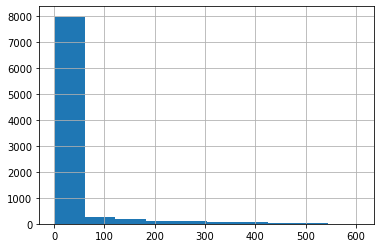

In [18]:
visited_sum.Mean_visited_7D.hist()

some users have visited the site very heavily,

In [19]:
adopted_users = pd.DataFrame(_grouped[_grouped.values >= 3])
adopted_users.head()

visited
user_id time_stamp                  
2       2014-02-09 03:45:04      3.0
        2014-02-13 03:45:04      3.0
10      2013-02-19 22:08:03      3.0
        2013-03-02 22:08:03      3.0
        2013-03-05 22:08:03      3.0

In [20]:
#we want to label adopted user as True and then merge back to users_data to use other available predictor variables

adopted_users['adopted'] = True
adopted_users.reset_index(inplace=True)
adopted_users.drop(['time_stamp','visited'], axis =1, inplace = True)
adopted_users = adopted_users.drop_duplicates(subset='user_id')


In [21]:
adopted_users.head()

,user_id,adopted
0,2,True
2,10,True
257,20,True
258,33,True
259,42,True


In [22]:
from functools import reduce

In [23]:
data_frames = [users, visited_sum, adopted_users]
users.rename(columns={'object_id': 'user_id'}, inplace = True)
df_merged = reduce(lambda  left,right: pd.merge(left,right, on='user_id',
                                            how='left'), data_frames)

In [24]:
df_merged['adopted'] = df_merged['adopted'].fillna(False)

In [25]:
df_merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited_Count_7D,Mean_visited_7D,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,1.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,14.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,1.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,1.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,1.0,False


In [26]:
# get dummy variables for category variable = creation source
df = pd.get_dummies(data=df_merged, columns=['creation_source'])

In [27]:
df.columns

Index(['user_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'visited_Count_7D', 'Mean_visited_7D', 'adopted',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [28]:
# drop variables that represnt information, but not direct relative to 'adoption'
df.drop(columns=['user_id','creation_time', 'name', 'email', 'last_session_creation_time'], inplace = True)

In [29]:
df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'visited_Count_7D', 'Mean_visited_7D', 'adopted',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [30]:
# split the data Predictors and target varialbes
X = df[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'visited_Count_7D', 'Mean_visited_7D',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH']]
y = df['adopted']

In [31]:
df.isnull().sum()

opted_in_to_mailing_list                 0
enabled_for_marketing_drip               0
org_id                                   0
invited_by_user_id                    5583
visited_Count_7D                      3177
Mean_visited_7D                       3177
adopted                                  0
creation_source_GUEST_INVITE             0
creation_source_ORG_INVITE               0
creation_source_PERSONAL_PROJECTS        0
creation_source_SIGNUP                   0
creation_source_SIGNUP_GOOGLE_AUTH       0
dtype: int64

In [32]:
#Fill the na values to 0, which means no visits, and not invited by other users, and no user_id is 0
X = X.fillna(0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model_name= 'Logistic Regression'
model= LogisticRegression()
# fit the model
res = model.fit(X, y)
# make predictions
y_pred= model.predict(X)

# computer average score
avg_score= round(accuracy_score(y, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))

# compute classification report
report= classification_report(y, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

/Users/dongw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy Score: 0.98
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     10398
        True       0.96      0.92      0.94      1602

    accuracy                           0.98     12000
   macro avg       0.98      0.96      0.97     12000
weighted avg       0.98      0.98      0.98     12000



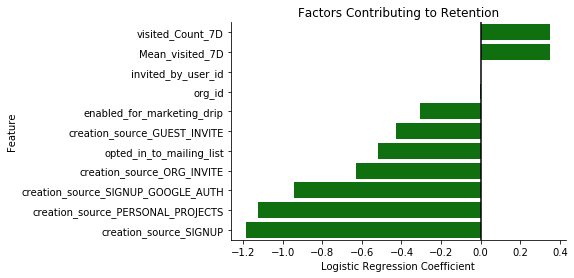

In [34]:

# Visualizing Feature Importance from the Logistic Regression
# create empty df
logit_df= pd.DataFrame()

coefficients= res.coef_.tolist()[0]
features= list(X.columns)

# Add features and their importance to the dataframe
logit_df['Feature']= features
logit_df['Coefficient']= coefficients

# Sort the dataframe by coefficient value
logit_df= logit_df.sort_values(by='Coefficient', ascending=False )

# plot the dataframe 
sns.barplot(x='Coefficient', y= 'Feature', data=logit_df, color='g')
plt.title('Factors Contributing to Retention')
plt.xlabel('Logistic Regression Coefficient')
plt.axvline(x=0, color='black')
sns.despine()

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X,y)

y_pred = model.predict(X)

# computer average score
avg_score= round(accuracy_score(y, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))

# compute classification report
report= classification_report(y, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Logistic Regression Accuracy Score: 1.0
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10398
        True       1.00      0.99      0.99      1602

    accuracy                           1.00     12000
   macro avg       1.00      0.99      1.00     12000
weighted avg       1.00      1.00      1.00     12000



/Users/dongw/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
def feature_importance(model, ax, label):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh', ax=ax, label=label)
    plt.title(label)

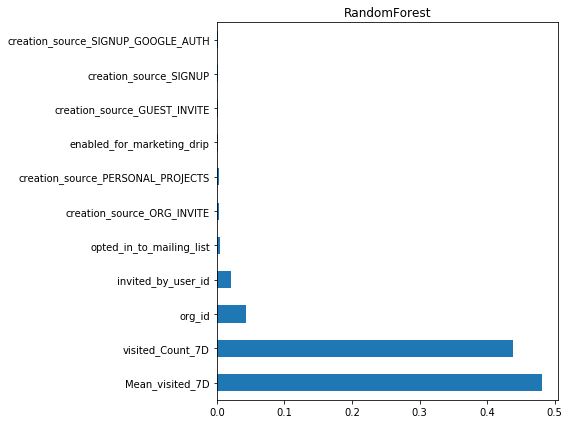

In [37]:
#Feature Importance (RF)
fig, ax=plt.subplots(1,1, figsize=(8,6))
feature_importance(model, ax, 'RandomForest')
plt.tight_layout()

conclusion:
1. The login counts contribute to predict the adopted users by both of the models
2. RF have more accuracy than LR. However, LR has shown the the users organzations may affect predict of the adoption of the products.
3. Techniquely, we need testing data to make sure the model is not overfitting.